In [31]:
import sklearn
from sklearn.datasets import load_digits 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import random

In [66]:
# load digits data set
digits = load_digits()

data = digits["data"]
images = digits["images"]
target = digits["target"]
target_names = digits["target_names"]

In [4]:
def euclidean_distance(A, B):
    #returns matrix D_ij where i is the ith instance of matrix A and j is the jth instance of matrix B
    #so D_ij is the euclidean distance between those two instances
    return np.sqrt(np.sum(np.square(A[:,None]-B),axis=2))

def sorted_euclidean_dist(A, B):
    return np.argsort(euclidean_distance(A, B), axis = 1)

In [ ]:
# 1797x1797 matrix that contains TP_i(m) in TP[i][m]
TP = np.dot(np.equal((target + np.zeros(len(target)**2).reshape(len(target),len(target))).T,target[sorted_euclidean_dist(data,data)]),np.triu([1]*len(target)))
TP.shape

In [ ]:
# 1797x1797 matrix that contains FP_i(m) in FP[i][m]
FP = np.dot(np.not_equal((target + np.zeros(len(target)**2).reshape(len(target),len(target))).T,target[sorted_euclidean_dist(data,data)]),np.triu([1]*len(target)))
FP.shape

In [101]:
# 1797x1797 matrix with N_i in each element of row i
#define N_matrix via last column of TP
N_matrix = (TP[:,len(TP)-1] + np.zeros(len(target)**2).reshape(len(target),len(target))).T

In [102]:
precision = TP/(TP + FP)
recall = TP/N_matrix

In [130]:
def mean_precision_recall(k):
    precision_k = precision[np.where(target == k)]
    recall_k = recall[np.where(target == k)]
    return np.mean(precision_k,axis = 0), np.mean(recall_k,axis = 0)

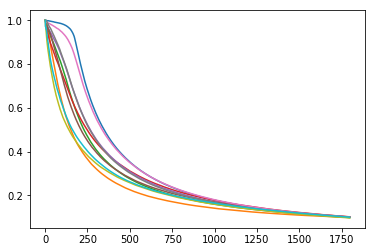

In [138]:
#percision plots
for k in range(0,10) :
    plt.plot(np.arange(1,1798),mean_precision_recall(k)[0])

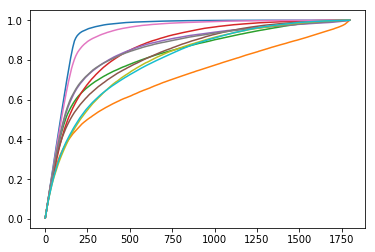

In [139]:
#recall plots
for k in range(0,10) :
    plt.plot(np.arange(1,1798),mean_precision_recall(k)[1])

In [119]:
np.where(target == 0)

(array([   0,   10,   20,   30,   36,   48,   49,   55,   72,   78,   79,
         101,  126,  130,  140,  150,  160,  166,  178,  179,  185,  202,
         208,  209,  229,  252,  256,  266,  276,  286,  292,  304,  305,
         311,  328,  334,  335,  357,  382,  386,  396,  406,  416,  422,
         434,  435,  441,  458,  464,  465,  487,  512,  516,  526,  536,
         546,  552,  564,  565,  571,  588,  594,  595,  617,  642,  646,
         656,  666,  676,  682,  694,  695,  701,  718,  724,  725,  747,
         772,  776,  786,  796,  806,  812,  824,  825,  831,  848,  854,
         855,  877,  902,  915,  925,  935,  941,  957,  974,  980,  981,
        1002, 1025, 1029, 1039, 1049, 1059, 1065, 1077, 1078, 1082, 1099,
        1105, 1106, 1128, 1153, 1157, 1167, 1177, 1187, 1193, 1205, 1206,
        1212, 1229, 1235, 1236, 1258, 1283, 1287, 1297, 1307, 1317, 1323,
        1335, 1336, 1342, 1359, 1365, 1366, 1388, 1413, 1415, 1425, 1435,
        1445, 1451, 1463, 1464, 1470, 

In [122]:
print(precision)
np.mean(precision[np.where(target == 0)],axis = 0)

[[1.         1.         1.         ... 0.09916435 0.09910913 0.09905398]
 [1.         1.         1.         ... 0.10139276 0.1013363  0.10127991]
 [1.         1.         1.         ... 0.09860724 0.09855234 0.0984975 ]
 ...
 [1.         1.         1.         ... 0.09693593 0.09688196 0.09682805]
 [1.         1.         1.         ... 0.10027855 0.10022272 0.10016694]
 [1.         1.         1.         ... 0.09693593 0.09688196 0.09682805]]


array([1.        , 1.        , 1.        , ..., 0.09916435, 0.09910913,
       0.09905398])